# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [2]:
import pandas as pd
import missingno as msno


/home/zaur/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [4]:
def count_missing_values(df):
  missing_counts = df.isnull().sum()
  return missing_counts

missing_values = count_missing_values(df)
print(missing_values)

CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64


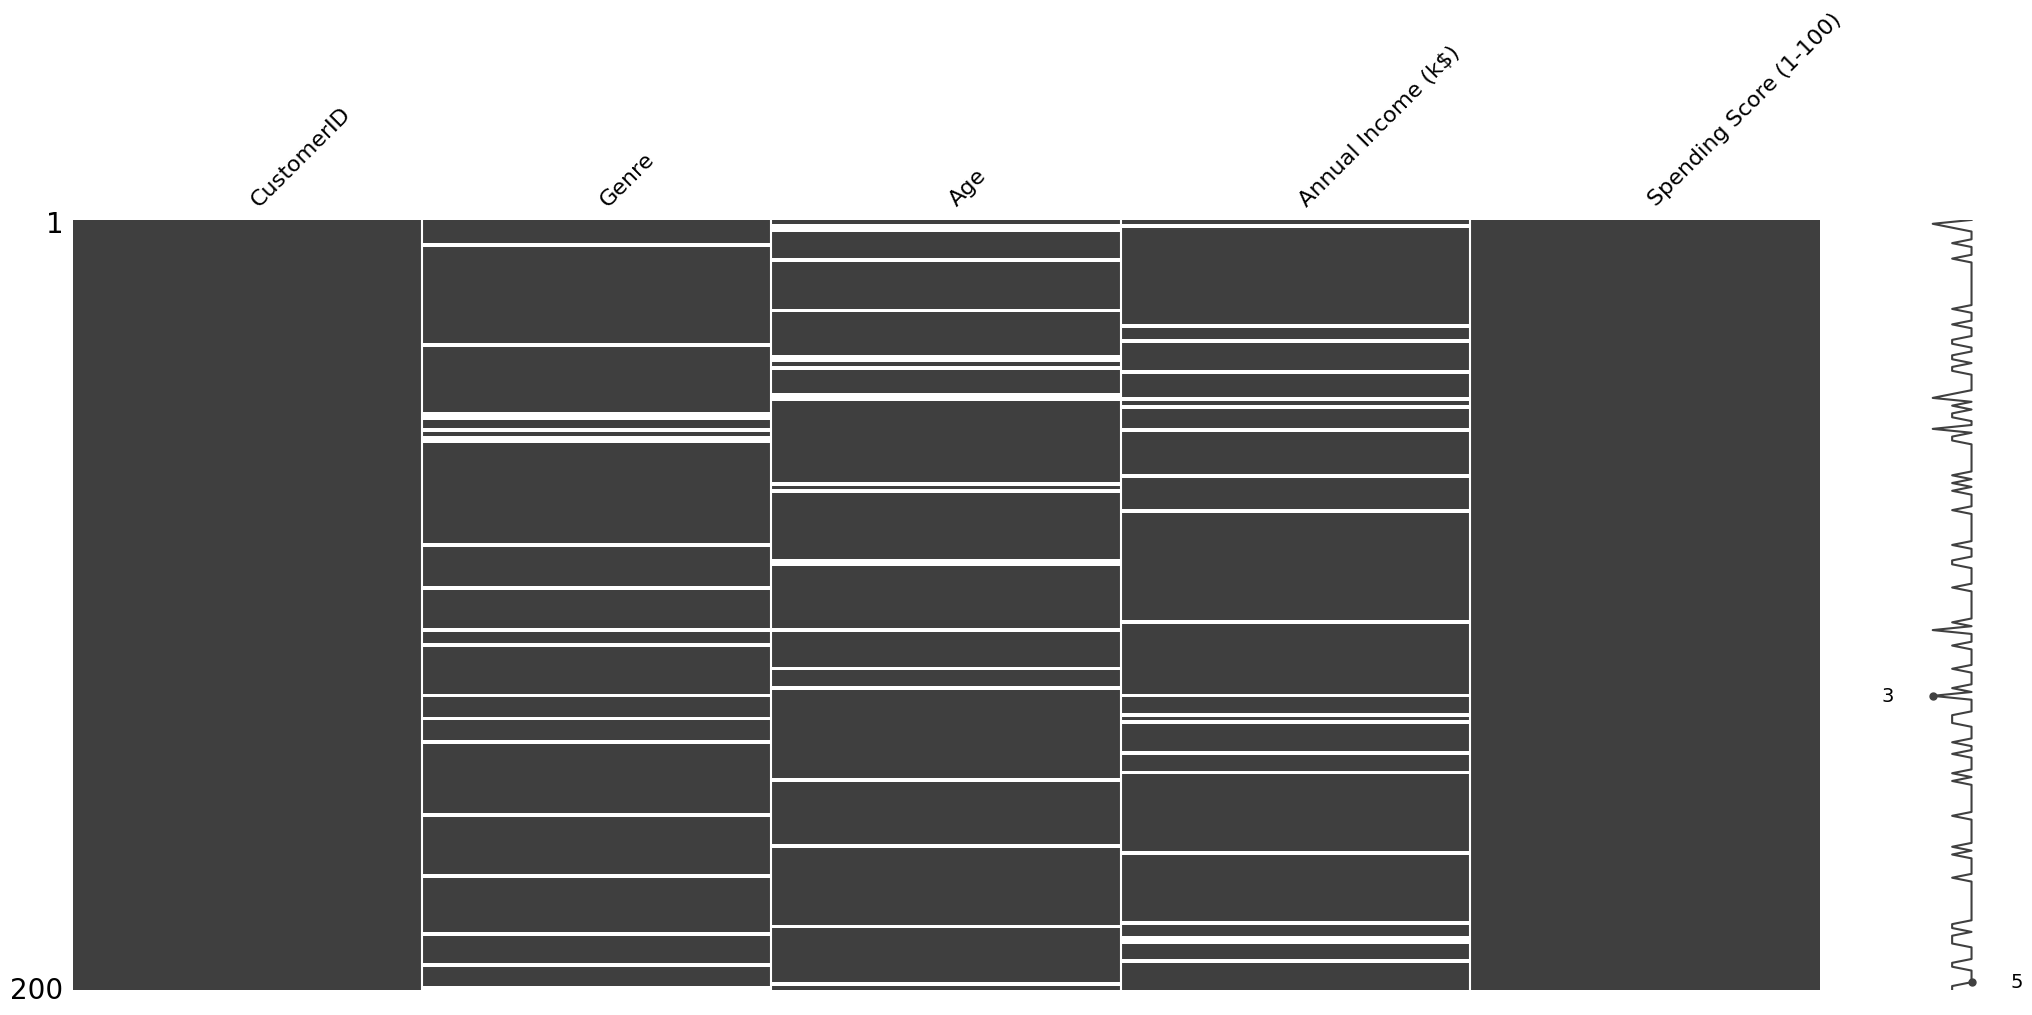

In [5]:
#Проверка на наличие пропусков
msno.matrix(df);  # Матрица пропусков

In [6]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

CustomerID: 200 distinct values
Genre: 4 distinct values
Age: 52 distinct values
Annual Income (k$): 65 distinct values
Spending Score (1-100): 84 distinct values


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

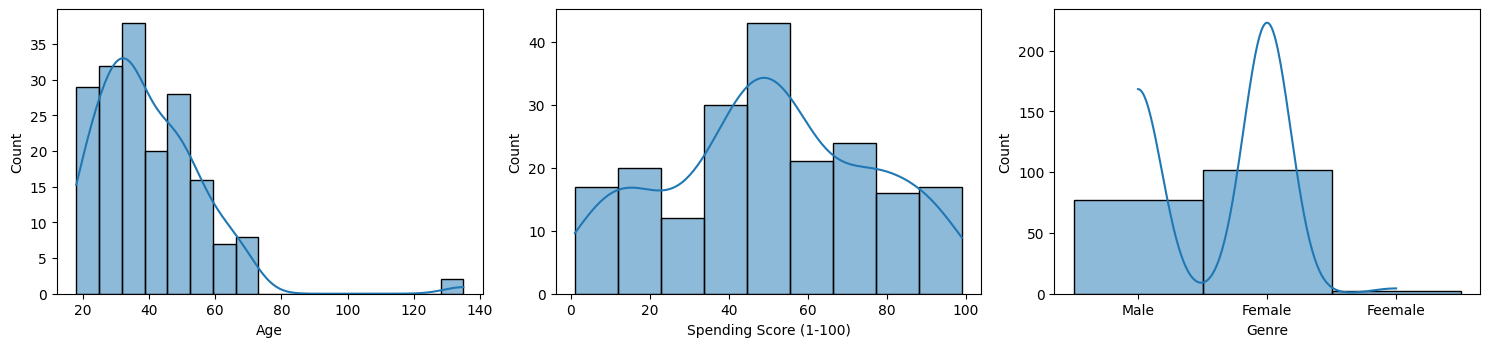

In [8]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Age', 'Spending Score (1-100)', 'Genre'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

(array([179.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.500000e+01, 1.000135e+05, 2.000120e+05, 3.000105e+05,
        4.000090e+05, 5.000075e+05, 6.000060e+05, 7.000045e+05,
        8.000030e+05, 9.000015e+05, 1.000000e+06]),
 <BarContainer object of 10 artists>)

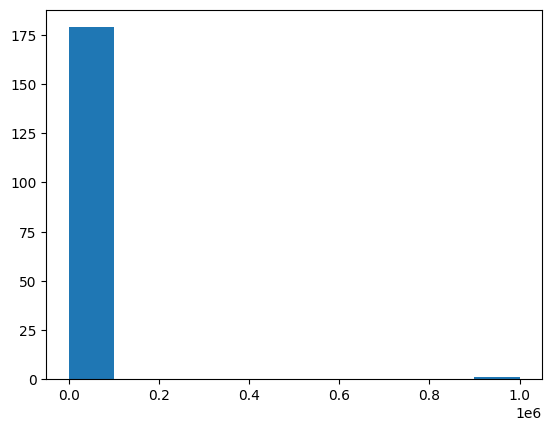

In [9]:
plt.hist(df['Annual Income (k$)'])

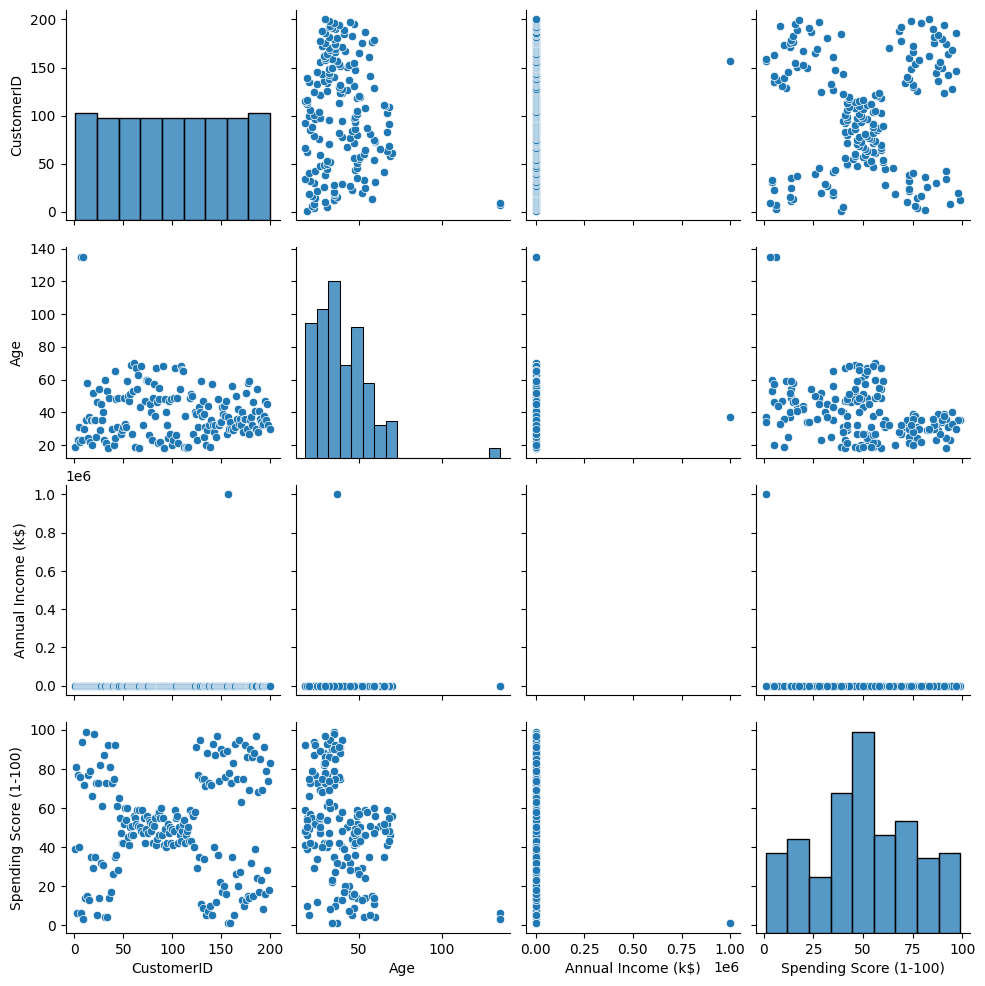

In [10]:
sns.pairplot(df);

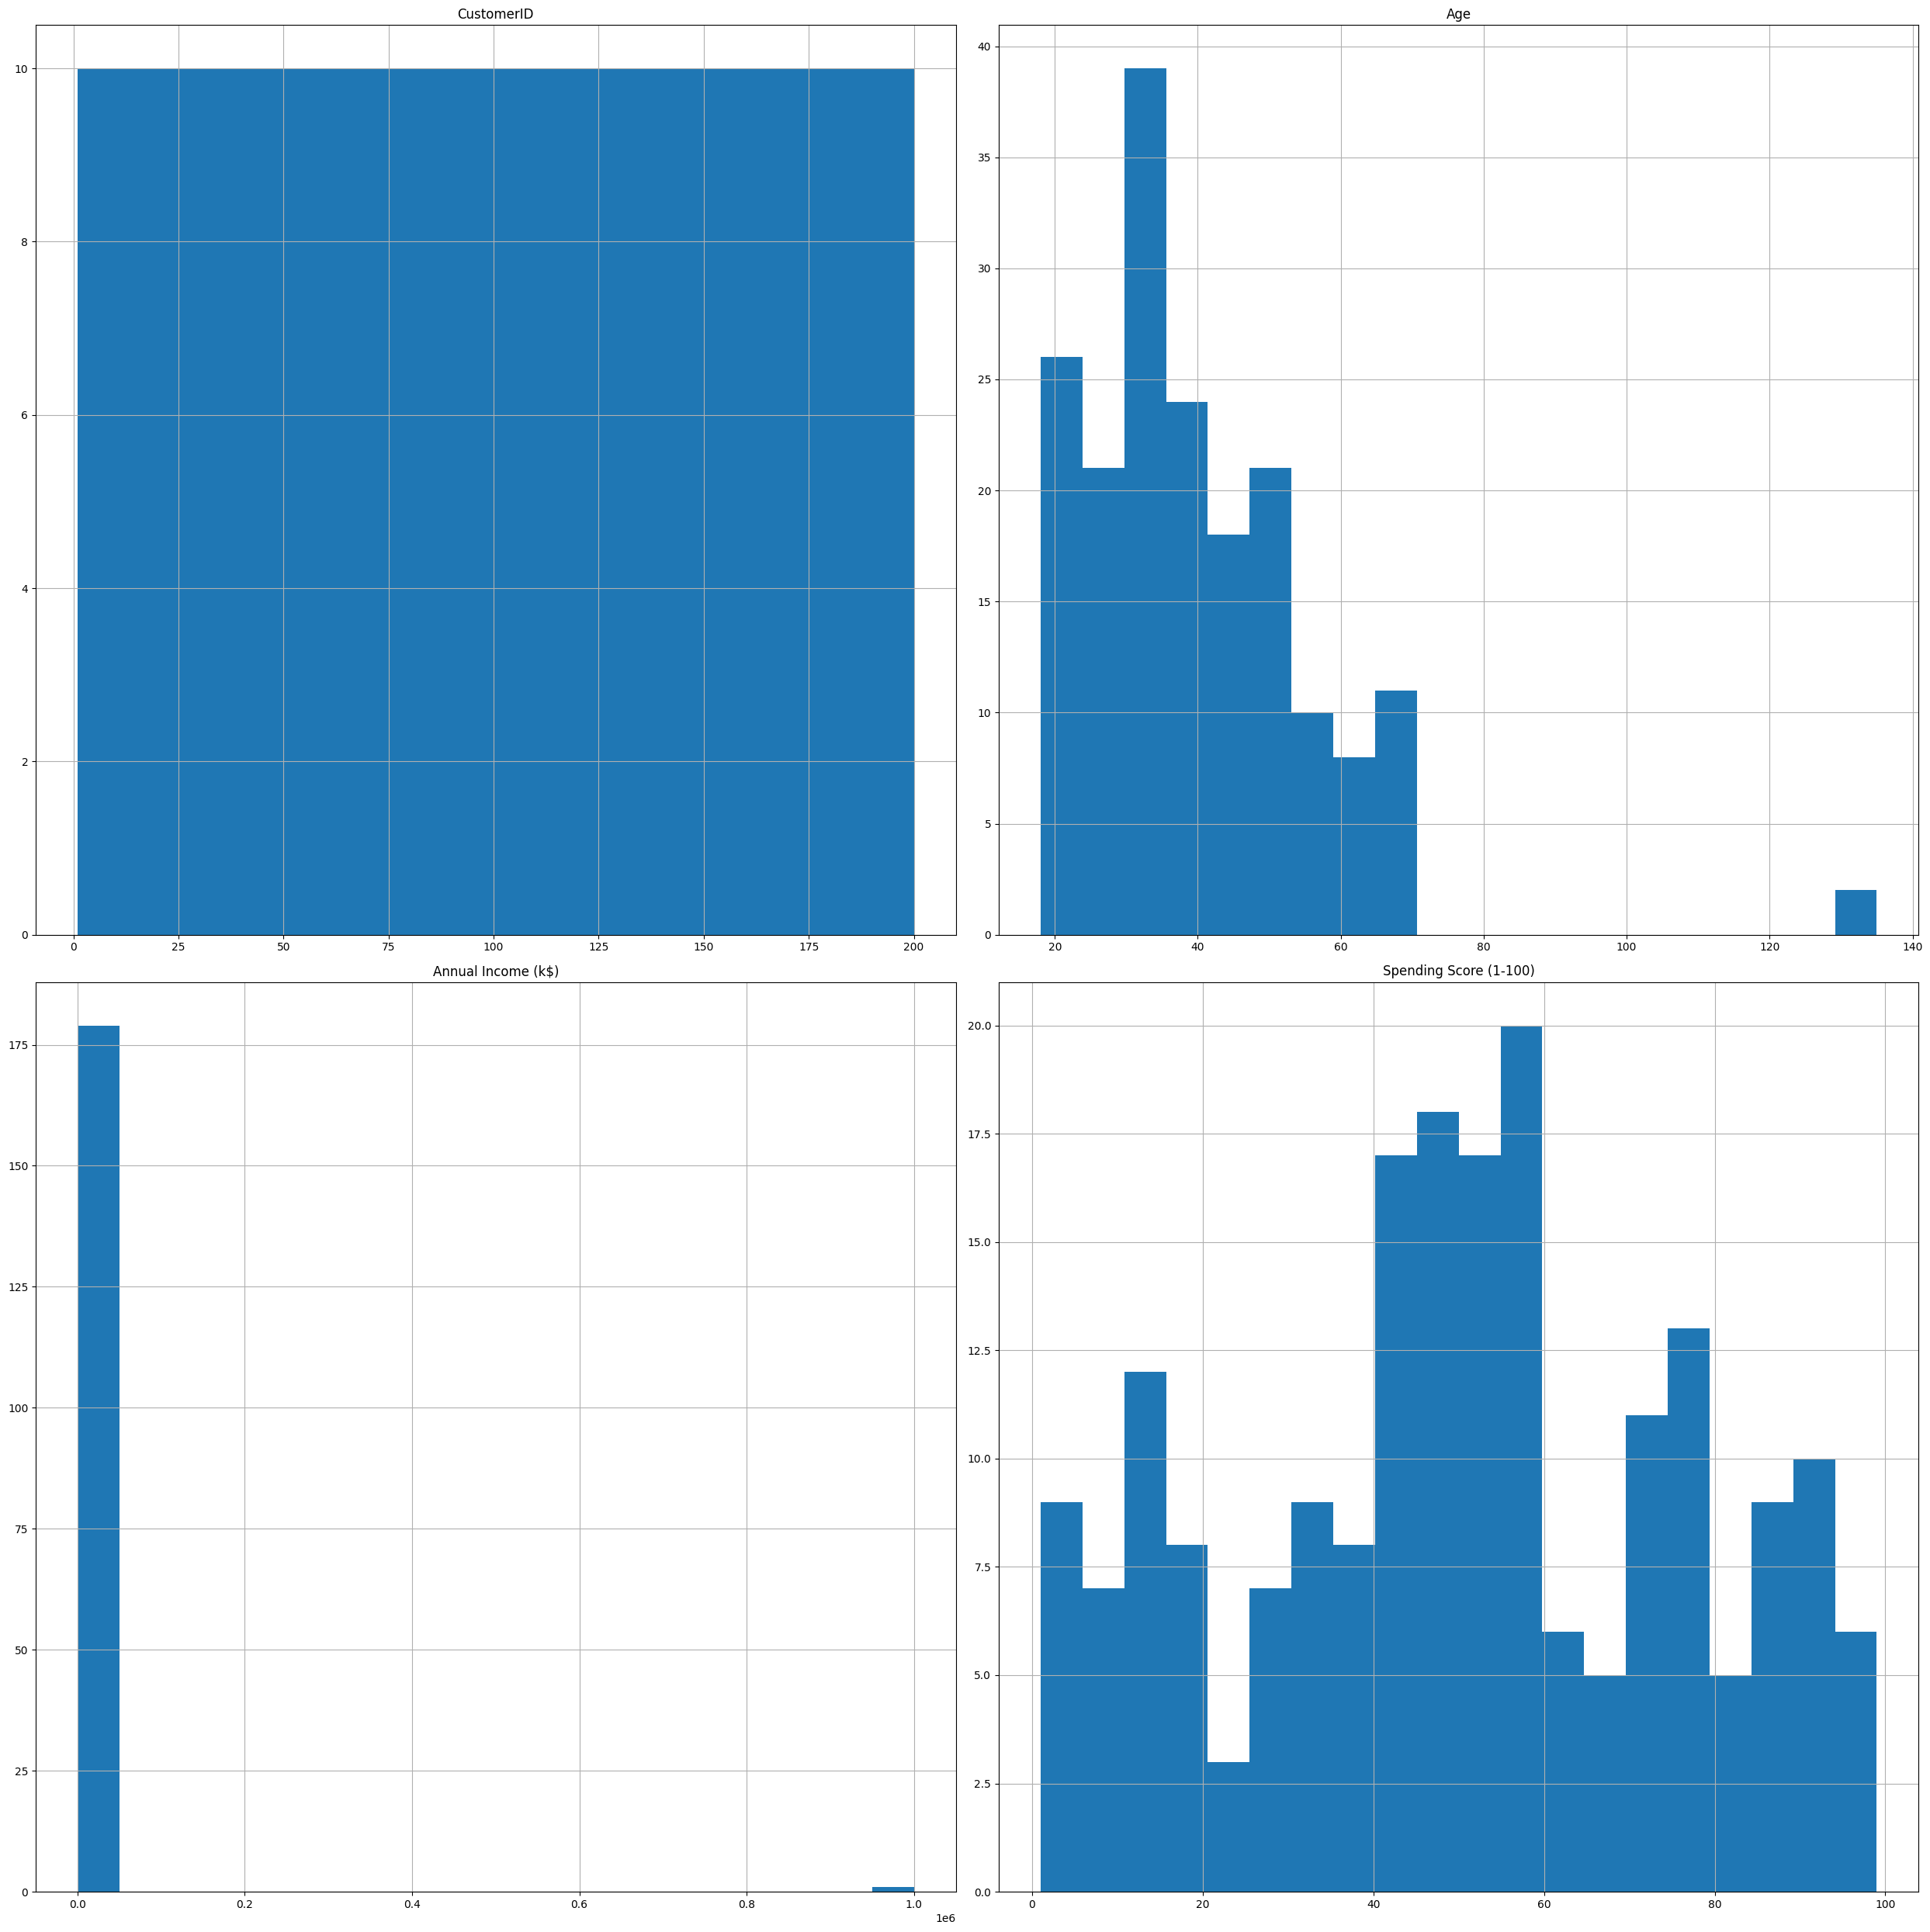

In [12]:
# Генерирует гистограммы для всех числовых столбцов в DataFrame
df.hist(figsize=(25, 25), bins=20)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.show();

In [13]:
df_numeric = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'CustomerID']]

In [14]:
import numpy as np

IndexError: index 2 is out of bounds for axis 1 with size 2

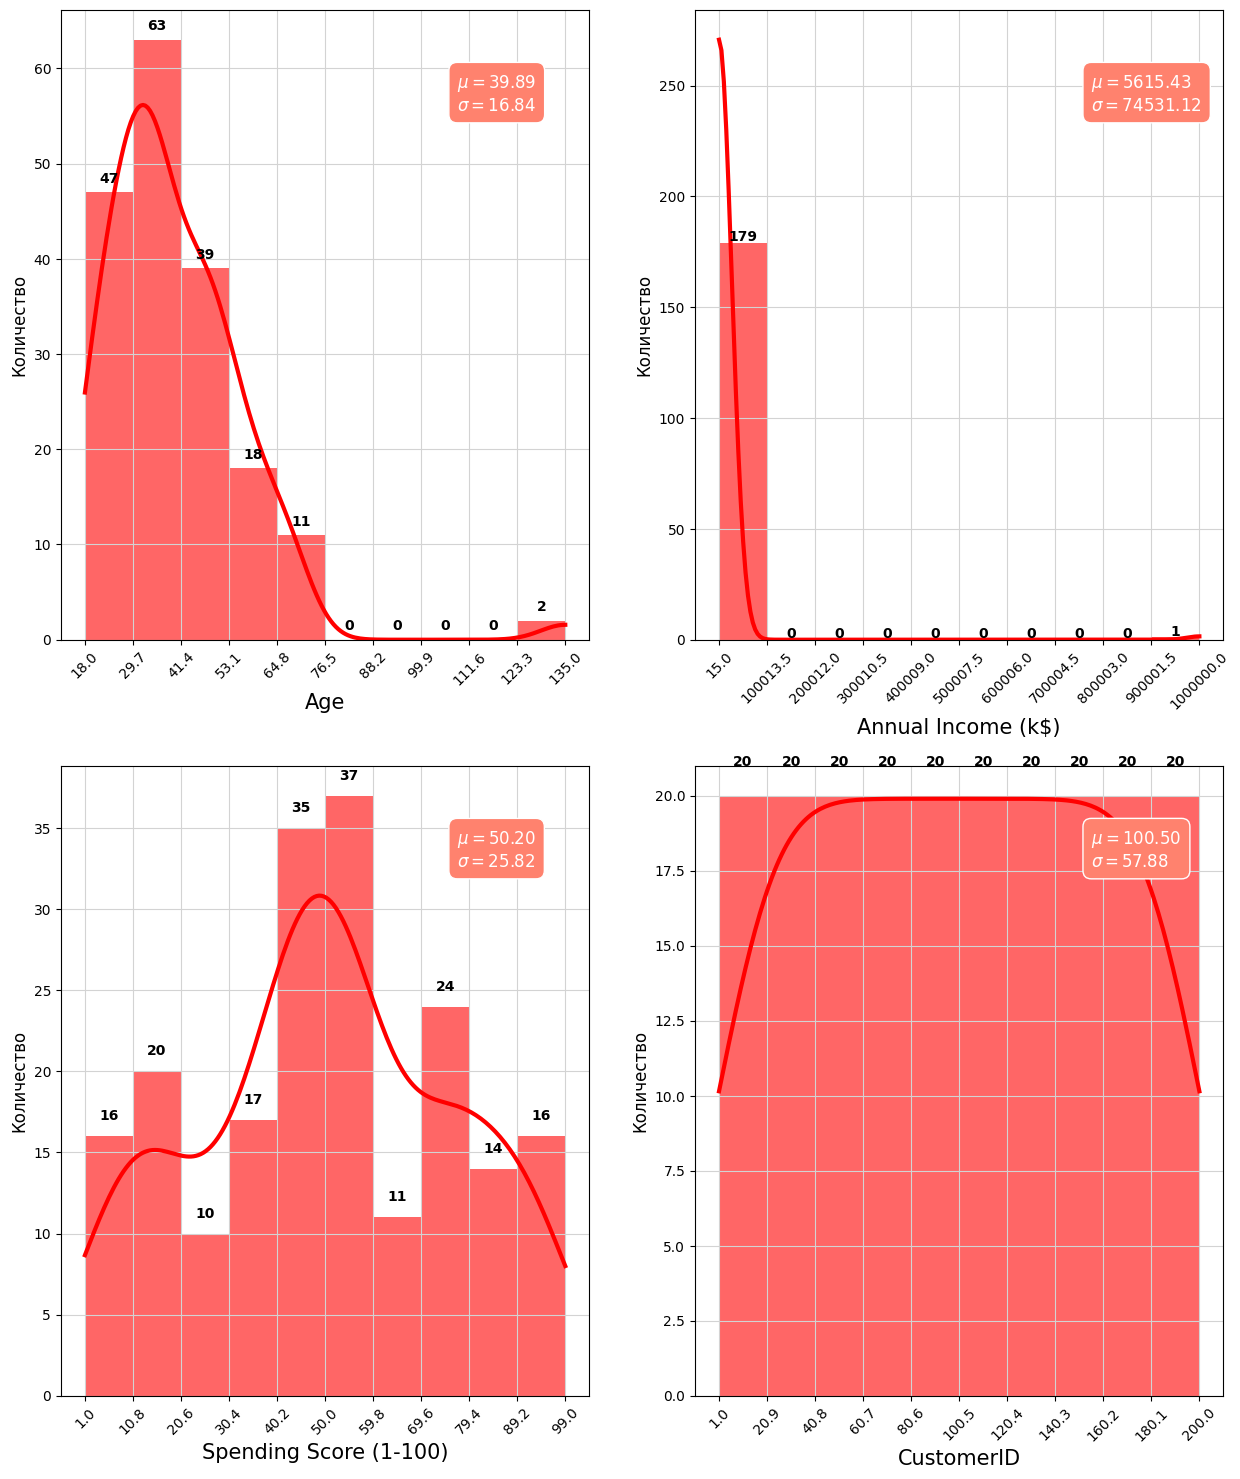

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 18))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_numeric.columns):
    x = i // 2
    y = i % 2
    values, bin_edges = np.histogram(df_numeric[col],
                                     range=(np.floor(df_numeric[col].min()), np.ceil(df_numeric[col].max())))

    graph = sns.histplot(data=df_numeric, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_numeric[col].mean(),
        r'$\sigma=%.2f$' % df_numeric[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

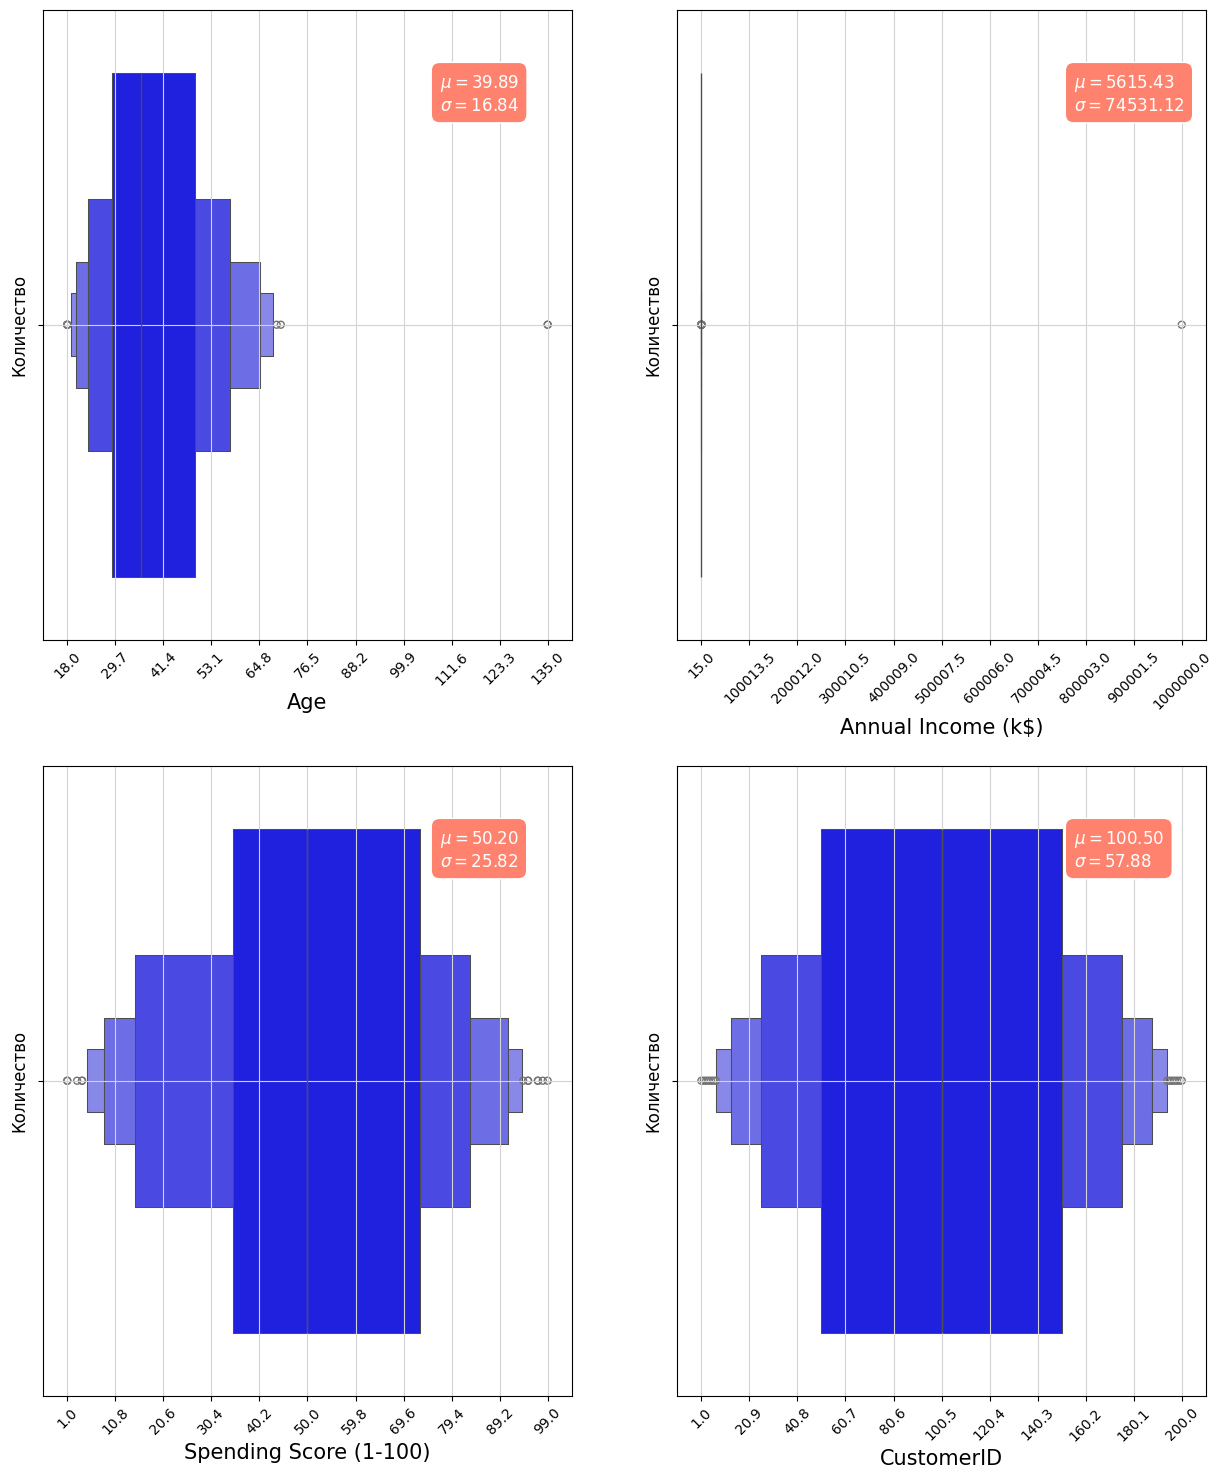

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 18))

# Цикл для построения гистограмм для каждого непрерывного признака
for i, col in enumerate(df_numeric.columns):
    x = i // 2
    y = i % 2
    values, bin_edges = np.histogram(df_numeric[col],
                                     range=(np.floor(df_numeric[col].min()), np.ceil(df_numeric[col].max())))

    graph = sns.boxenplot(data=df_numeric, x=col, ax=ax[x, y],
                         color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')


    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_numeric[col].mean(),
        r'$\sigma=%.2f$' % df_numeric[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [18]:
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

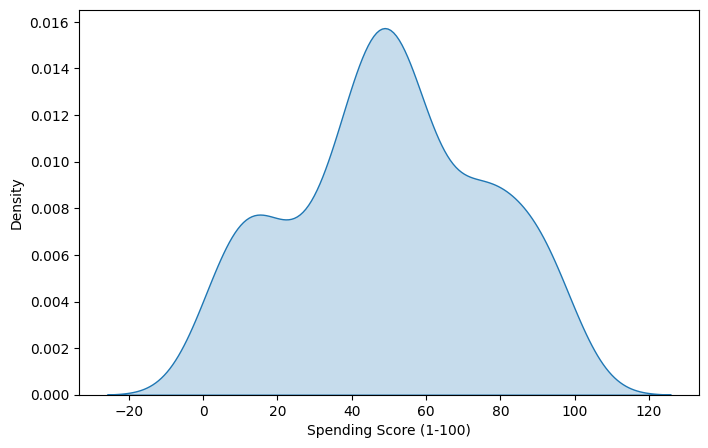

In [19]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Spending Score (1-100)'], fill=True);

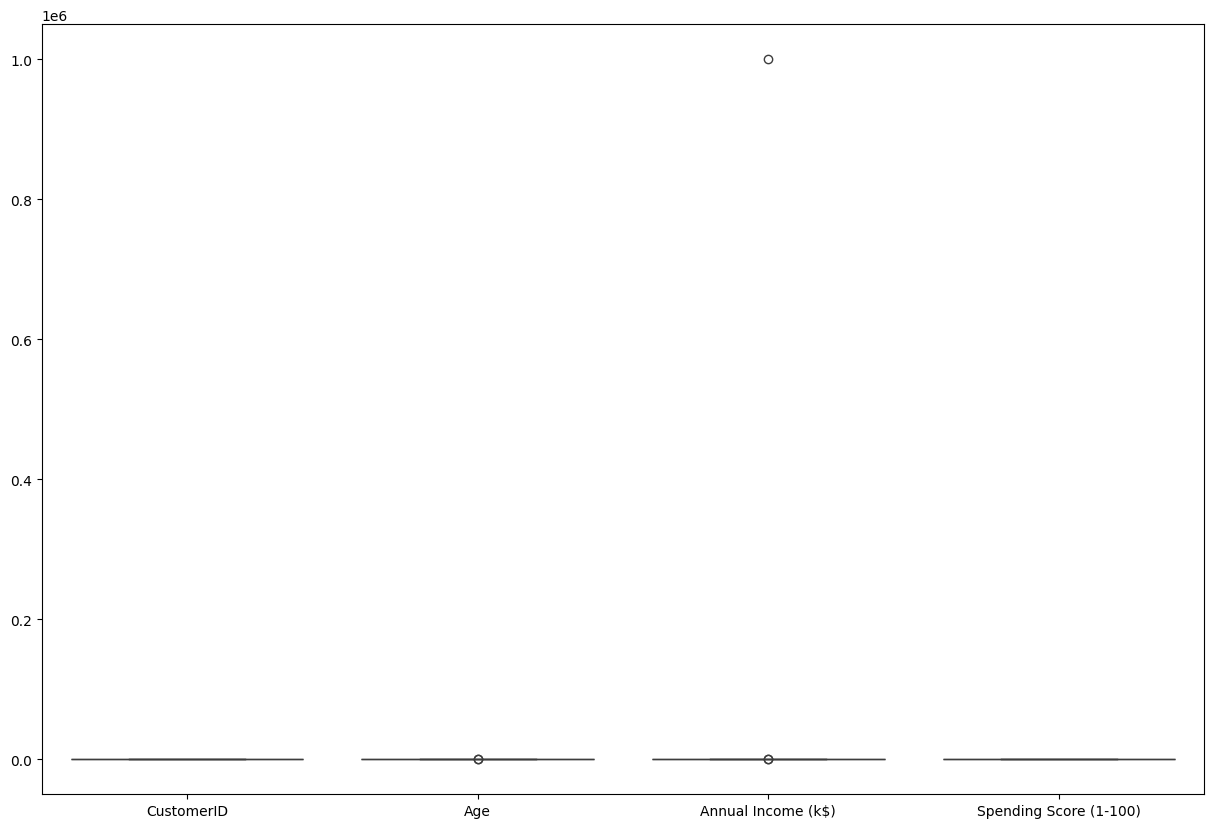

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, ax=ax)
plt.show()

Практически выбросов не наблюдаем

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Spending Score (1-100)', axis=1),  # Извлечение признаков
    df['Spending Score (1-100)'],  # Извлечение целевой переменной
    test_size=0.2,  # 20% для тестовой выборки
    random_state=1  # Фиксирование случайности для воспроизводимости
)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [23]:
X_train.shape


(160, 4)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 108 to 37
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          160 non-null    int64  
 1   Genre               145 non-null    object 
 2   Age                 145 non-null    float64
 3   Annual Income (k$)  142 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.2+ KB


In [25]:
X_train.isnull().sum()

CustomerID             0
Genre                 15
Age                   15
Annual Income (k$)    18
dtype: int64

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [27]:
# Заполнение числовых пропусков медианным значением
imputer = SimpleImputer(strategy='median')
X_train['Age'] = imputer.fit_transform(X_train[['Age']])

In [28]:
# Заполнение пропусков в числовых признаках с помощью KNN
imputer = KNNImputer(n_neighbors=5)
X_train[['Annual Income (k$)']] = imputer.fit_transform(X_train[['Annual Income (k$)']])

In [29]:
X_train['Genre'] = X_train['Genre'].fillna(X_train['Genre'].mode()[0])

In [30]:
X_train.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual Income (k$)    0
dtype: int64

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [53]:
X_train_numeric = X_train[['Age', 'Annual Income (k$)']]

In [54]:
X_train_numeric.head(100)

,Age,Annual Income (k$)
108,68.0,63.000000
107,54.0,63.000000
189,36.0,103.000000
14,37.0,20.000000
56,51.0,44.000000
...,...,...
23,37.0,25.000000
126,43.0,71.000000
9,30.0,19.000000
170,40.0,87.000000


In [59]:
X_train_numeric['Annual Income (k$)'] = pd.to_numeric(X_train_numeric['Annual Income (k$)'], errors='coerce')
X_train_numeric['Age'] = pd.to_numeric(X_train_numeric['Age'], errors='coerce')

/tmp/ipykernel_82039/2850313366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numeric['Annual Income (k$)'] = pd.to_numeric(X_train_numeric['Annual Income (k$)'], errors='coerce')
/tmp/ipykernel_82039/2850313366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numeric['Age'] = pd.to_numeric(X_train_numeric['Age'], errors='coerce')


In [58]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 108 to 37
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 160 non-null    float64
 1   Annual Income (k$)  160 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


In [65]:
# Поиск выбросов с помощью метода квартилей
Q1 = np.percentile(X_train_numeric['Annual Income (k$)'], 25)
Q3 = np.percentile(X_train_numeric['Annual Income (k$)'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers1 = [x for x in X_train_numeric['Annual Income (k$)'] if x < lower_bound or x > upper_bound]

Q1 = np.percentile(X_train_numeric['Age'], 25)
Q3 = np.percentile(X_train_numeric['Age'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers2 = [x for x in X_train_numeric['Age'] if x < lower_bound or x > upper_bound]

In [74]:
# Преобразование outliers1 в DataFrame
outliers1_df = pd.DataFrame({'Annual Income (k$)': outliers1})
outliers1_df

,Annual Income (k$)
0,7101.739437
1,7101.739437
2,137.000000
3,7101.739437
4,7101.739437
5,7101.739437
6,7101.739437
7,7101.739437
8,7101.739437
9,7101.739437


In [89]:
# Преобразование outliers2 в DataFrame
outliers2_df = pd.DataFrame({'Age': outliers2})
outliers2_df

,Age
0,135.0
1,135.0


In [90]:
# Замена выбросов медианой
for i, x in enumerate(outliers1_df):
  if x in outliers1_df:
    outliers1_df[i] = np.median(outliers1_df)

In [94]:
for i, x in enumerate(outliers2_df):
  if x in outliers2_df:
    outliers2_df[i] = np.median(outliers2_df)

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [95]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [97]:
# Создание экземпляров нормализаторов
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [98]:
# Нормализация признаков
X_train_numeric['Age'] = min_max_scaler.fit_transform(X_train[['Age']])
X_train_numeric['Annual Income (k$)'] = standard_scaler.fit_transform(X_train_numeric[['Annual Income (k$)']])

/tmp/ipykernel_82039/258596659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numeric['Age'] = min_max_scaler.fit_transform(X_train[['Age']])
/tmp/ipykernel_82039/258596659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numeric['Annual Income (k$)'] = standard_scaler.fit_transform(X_train_numeric[['Annual Income (k$)']])


Стратегия: Min-Max Scaling
 Аргументация: Возраст имеет линейную шкалу без выбросов, и для него важно сохранить относительные расстояния между значениями. Min-Max Scaling позволяет масштабировать значения в диапазон [0, 1], сохраняя относительную величину разницы между возрастами.

Стратегия: Z-Score Standardization
 Аргументация: Годовой доход покупателя также имеет линейную шкалу, но может содержать выбросы (например, покупатели с очень высоким доходом). Z-Score Standardization центрирует данные и масштабирует их к стандартному отклонению, что позволяет сгладить влияние выбросов и обеспечить нормальное распределение.

В этом примере мы использовали разные стратегии нормализации для каждого числового признака, основываясь на его свойствах и особенностях данных. Такой подход позволяет оптимизировать производительность моделей машинного обучения и получить более точные результаты

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [99]:
X_train['Genre'].value_counts()


Genre
Female     92
Male       67
Feemale     1
Name: count, dtype: int64

In [100]:
X_train['Genre'] = X_train['Genre'].fillna(X_train['Genre'].mode()[0])

In [101]:
X_train['Genre'] = X_train['Genre'].replace({'Feemale': 'Female'})
X_train['Genre_coded'] = pd.Categorical(X_train['Genre'], categories=['Female', 'Male'], ordered=True)
X_train['Genre_coded'] = X_train['Genre_coded'].cat.codes

X_train['Genre'].value_counts()

Genre
Female    93
Male      67
Name: count, dtype: int64

In [103]:
X_train_ct = X_train['Genre_coded']

In [104]:
# Конкатенация по столбцам (axis=1)
X_train = pd.concat([X_train_ct, X_train_numeric], axis=1)

In [105]:
X_train

,Genre_coded,Age,Annual Income (k$)
108,1,0.427350,-0.089354
107,1,0.307692,-0.089354
189,0,0.153846,-0.088847
14,1,0.162393,-0.089900
56,0,0.282051,-0.089596
...,...,...,...
133,0,0.111111,-0.089240
137,1,0.119658,-0.089227
72,0,0.358974,-0.089519
140,0,0.333333,-0.089202


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [106]:
X_test.shape


(40, 4)

In [107]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 58 to 172
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          40 non-null     int64  
 1   Genre               36 non-null     object 
 2   Age                 35 non-null     float64
 3   Annual Income (k$)  38 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB


In [108]:
X_test.isnull().sum()

CustomerID            0
Genre                 4
Age                   5
Annual Income (k$)    2
dtype: int64

In [111]:
# Заполнение числовых пропусков медианным значением
imputer = SimpleImputer(strategy='median')
X_test['Age'] = imputer.fit_transform(X_test[['Age']])

# Заполнение пропусков в числовых признаках с помощью KNN
imputer = KNNImputer(n_neighbors=5)
X_test[['Annual Income (k$)']] = imputer.fit_transform(X_test[['Annual Income (k$)']])

X_test['Genre'] = X_test['Genre'].fillna(X_test['Genre'].mode()[0])

In [112]:
X_test.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual Income (k$)    0
dtype: int64

In [113]:
X_test_numeric = X_test[['Age', 'Annual Income (k$)']]
X_test

,CustomerID,Genre,Age,Annual Income (k$)
58,59,Female,27.0,46.000000
40,41,Female,65.0,38.000000
34,35,Feemale,49.0,33.000000
102,103,Male,67.0,62.000000
184,185,Female,41.0,99.000000
198,199,Male,36.0,137.000000
95,96,Female,24.0,60.000000
4,5,Female,31.0,17.000000
29,30,Female,23.0,29.000000
168,169,Female,36.0,87.000000


In [115]:
# Поиск выбросов с помощью метода квартилей
Q1 = np.percentile(X_test_numeric['Annual Income (k$)'], 25)
Q3 = np.percentile(X_test_numeric['Annual Income (k$)'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers3 = [x for x in X_test_numeric['Annual Income (k$)'] if x < lower_bound or x > upper_bound]

Q1 = np.percentile(X_test_numeric['Age'], 25)
Q3 = np.percentile(X_test_numeric['Age'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers4 = [x for x in X_test_numeric['Age'] if x < lower_bound or x > upper_bound]

In [116]:
# Преобразование outliers3 в DataFrame
outliers3_df = pd.DataFrame({'Annual Income (k$)': outliers3})
outliers3_df

,Annual Income (k$)


In [117]:
# Преобразование outliers4 в DataFrame
outliers4_df = pd.DataFrame({'Age': outliers4})
outliers4_df

,Age


Выбросов на тестовых данных не наблюдаем.

In [118]:
# Нормализация признаков
X_test_numeric['Age'] = min_max_scaler.fit_transform(X_test[['Age']])
X_test_numeric['Annual Income (k$)'] = standard_scaler.fit_transform(X_test_numeric[['Annual Income (k$)']])

/tmp/ipykernel_82039/1035955413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_numeric['Age'] = min_max_scaler.fit_transform(X_test[['Age']])
/tmp/ipykernel_82039/1035955413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_numeric['Annual Income (k$)'] = standard_scaler.fit_transform(X_test_numeric[['Annual Income (k$)']])


In [119]:
X_test['Genre'].value_counts()

Genre
Female     29
Male       10
Feemale     1
Name: count, dtype: int64

In [120]:
X_test['Genre'] = X_test['Genre'].replace({'Feemale': 'Female'})
X_test['Genre_coded'] = pd.Categorical(X_test['Genre'], categories=['Female', 'Male'], ordered=True)
X_test['Genre_coded'] = X_test['Genre_coded'].cat.codes

X_test['Genre'].value_counts()

Genre
Female    30
Male      10
Name: count, dtype: int64

In [123]:
X_test_ct = X_test['Genre_coded']

In [124]:
X_test_ct

58     0
40     0
34     0
102    1
184    0
198    1
95     0
4      0
29     0
168    0
171    1
18     1
11     0
89     0
110    0
118    0
159    0
35     0
136    0
59     1
51     0
16     0
44     0
94     0
31     0
162    1
38     0
28     0
193    0
27     1
47     0
165    0
194    0
177    1
176    1
97     0
174    0
73     0
69     0
172    1
Name: Genre_coded, dtype: int8

In [125]:
# Конкатенация по столбцам (axis=1)
X_test = pd.concat([X_test_ct, X_test_numeric], axis=1)
X_test

,Genre_coded,Age,Annual Income (k$)
58,0,0.130435,-0.537670
40,0,0.956522,-0.818033
34,0,0.608696,-0.993260
102,1,1.000000,0.023056
184,0,0.434783,1.319735
198,1,0.326087,2.651460
95,0,0.065217,-0.047035
4,0,0.217391,-1.553986
29,0,0.043478,-1.133441
168,0,0.326087,0.899191


In [126]:
X_train.shape, X_test.shape

((160, 3), (40, 3))